In [9]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [13]:
df = pd.read_excel('mairowave_3.xlsx',header=0,sheet_name='Sheet1')
# df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2011-06-22,3.4173
1,2011-07-22,0.0000
2,2011-08-21,0.0000
3,2011-09-20,0.0000
4,2011-10-20,0.0000


In [14]:
m = Prophet()
# m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -63.9456
Iteration  1. Log joint probability =    35.4879. Improved by 99.4335.
Iteration  2. Log joint probability =    50.6454. Improved by 15.1574.
Iteration  3. Log joint probability =    53.7948. Improved by 3.14942.
Iteration  4. Log joint probability =    59.7432. Improved by 5.9484.
Iteration  5. Log joint probability =    60.2464. Improved by 0.503173.
Iteration  6. Log joint probability =    60.5343. Improved by 0.287986.
Iteration  7. Log joint probability =    60.6036. Improved by 0.069278.
Iteration  8. Log joint probability =    60.6296. Improved by 0.0260016.
Iteration  9. Log joint probability =    60.6637. Improved by 0.034124.
Iteration 10. Log joint probability =    60.7019. Improved by 0.0381265.
Iteration 11. Log joint probability =    60.7021. Improved by 0.000256123.
Iteration 12. Log joint probability =    60.7236. Improved by 0.0214393.
Iteration 13. Log joint probability =     60.734. Improved by 0.0104492.
Iteration 14. Log joi

In [15]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
412,2016-08-25
413,2016-08-26
414,2016-08-27
415,2016-08-28
416,2016-08-29


In [21]:
# Python
forecast = m.predict(future)
forecast.to_excel


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-06-22,-2.294931,-7.783047,4.834040,-2.294931,-2.294931,0.587810,0.587810,0.587810,0.587810,0.587810,0.587810,0.0,0.0,0.0,-1.707121
1,2011-07-22,-1.985898,-9.917122,3.111874,-1.985898,-1.985898,-1.329938,-1.329938,-1.329938,-1.329938,-1.329938,-1.329938,0.0,0.0,0.0,-3.315836
2,2011-08-21,-1.676865,-9.868709,2.649553,-1.676865,-1.676865,-2.028496,-2.028496,-2.028496,-2.028496,-2.028496,-2.028496,0.0,0.0,0.0,-3.705361
3,2011-09-20,-1.367832,-7.712164,4.508104,-1.367832,-1.367832,-0.224099,-0.224099,-0.224099,-0.224099,-0.224099,-0.224099,0.0,0.0,0.0,-1.591931
4,2011-10-20,-1.058799,-6.857761,6.026571,-1.058799,-1.058799,0.459731,0.459731,0.459731,0.459731,0.459731,0.459731,0.0,0.0,0.0,-0.599068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2016-08-25,17.184450,8.067727,20.778452,17.184450,17.184451,-2.649147,-2.649147,-2.649147,-2.649147,-2.649147,-2.649147,0.0,0.0,0.0,14.535304
413,2016-08-26,17.194752,7.736063,20.574803,17.194751,17.194752,-2.803410,-2.803410,-2.803410,-2.803410,-2.803410,-2.803410,0.0,0.0,0.0,14.391342
414,2016-08-27,17.205053,7.947489,20.792393,17.205052,17.205053,-2.953399,-2.953399,-2.953399,-2.953399,-2.953399,-2.953399,0.0,0.0,0.0,14.251654
415,2016-08-28,17.215354,7.935268,20.465036,17.215354,17.215354,-3.093108,-3.093108,-3.093108,-3.093108,-3.093108,-3.093108,0.0,0.0,0.0,14.122246


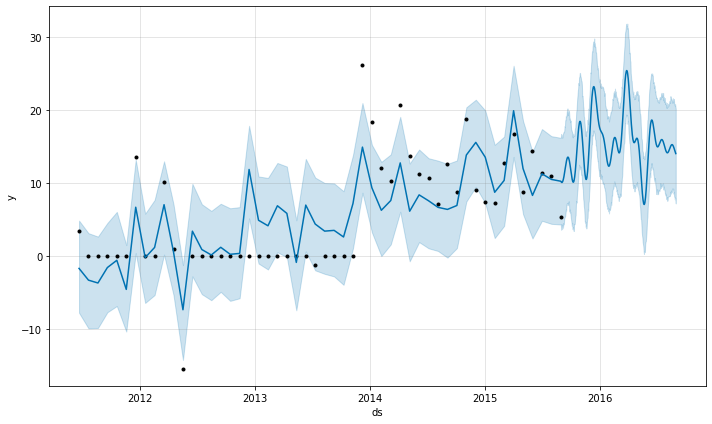

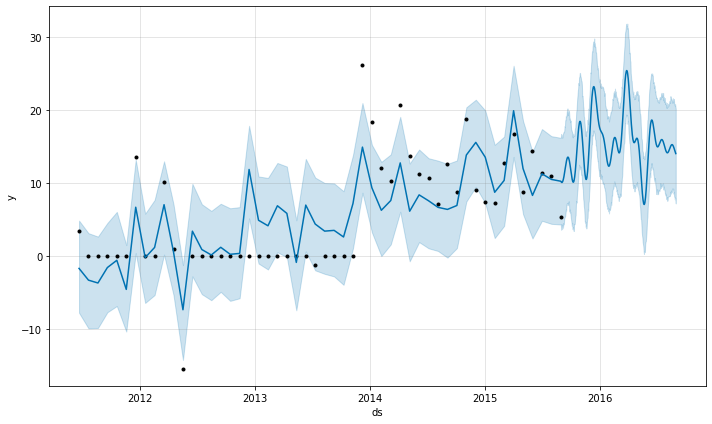

In [22]:
m.plot(forecast)

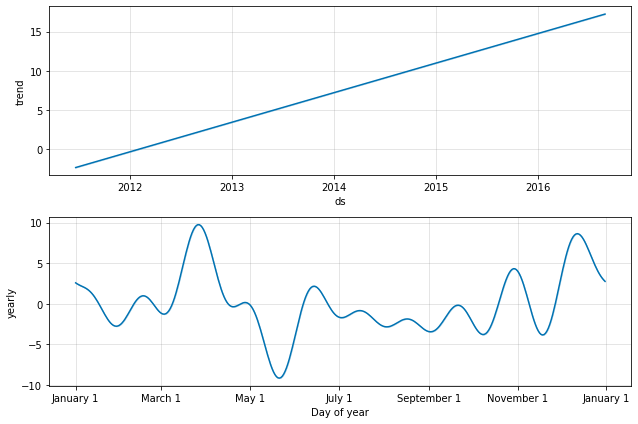

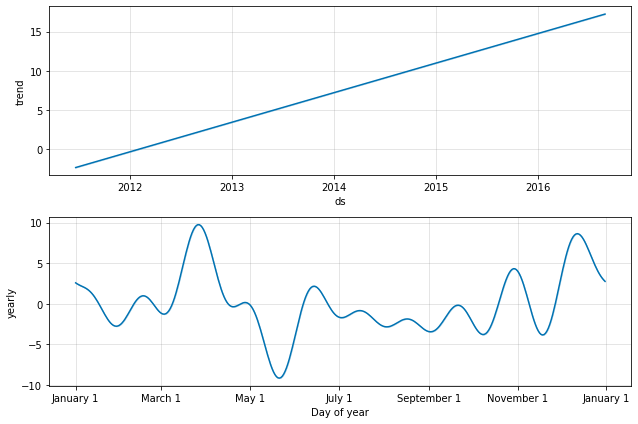

In [20]:
m.plot_components(forecast)

In [67]:
#Forecasting Growth
df = pd.read_csv('example_wp_R.csv')
df['y'] = np.log(df['y'])

In [68]:
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.9808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9006.48      0.013255       437.619           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        9013.5    0.00172864       185.508           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9018.08   0.000796634       150.155      0.2496           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       9019.19   0.000949884       183.784   7.263e-06       0.001      430  LS failed, Hessian reset 
     399       9019.61   0.000191911       81.8178           1           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9019.73   1.02599e-06    

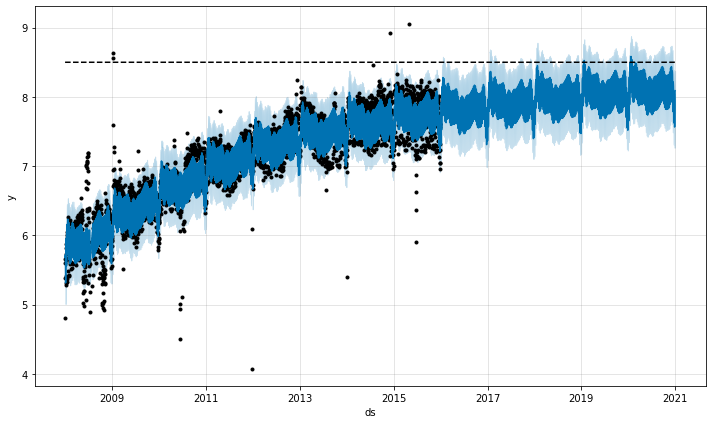

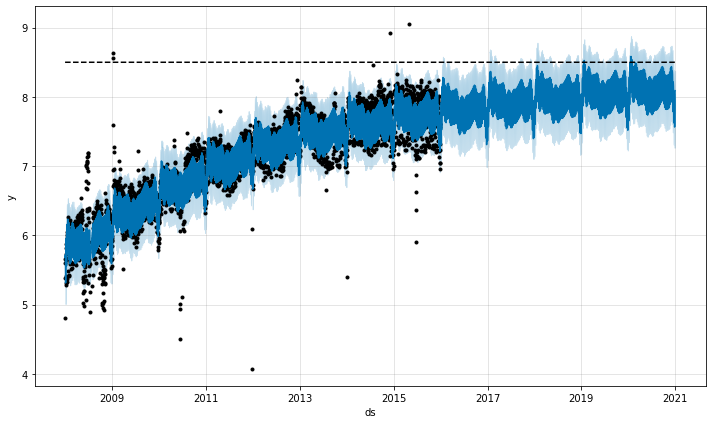

In [69]:
# 指定上限df['cap'] = 8.5
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.8456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9115.75     0.0139778       1902.79           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9155.14    0.00686726       407.448           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9176.72     0.0100971       1073.82           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9188.87    0.00158872       553.436           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9193.08    0.00210991       359.193           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

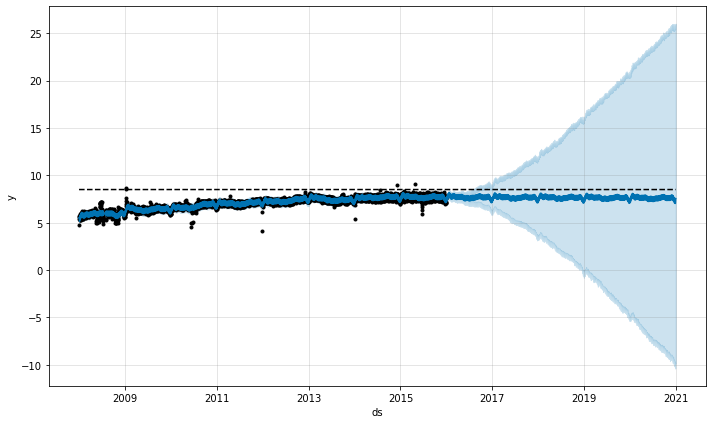

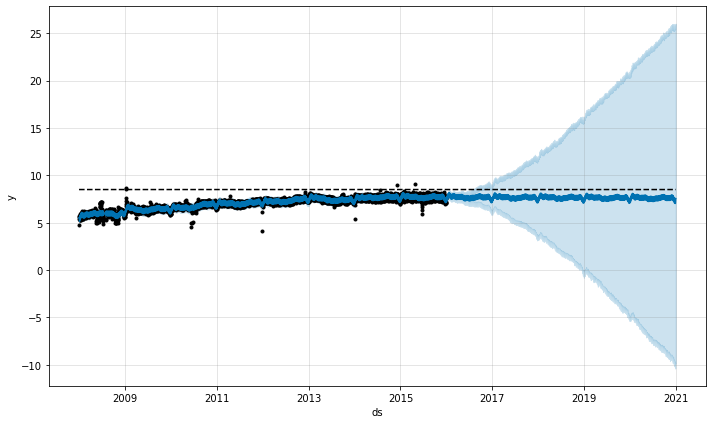

In [70]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.8456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       8807.96   6.29379e-05        3252.7   2.167e-08       0.001      132  LS failed, Hessian reset 
      99        8808.1   5.74758e-07       2912.81      0.3057           1      181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       8809.12   0.000356185       3360.67   2.322e-07       0.001      298  LS failed, Hessian reset 
     152       8809.96   3.25428e-05          2865   8.972e-09       0.001      377  LS failed, Hessian reset 
     188       8810.03   1.20904e-08       2023.75      0.2829      0.2829      439   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


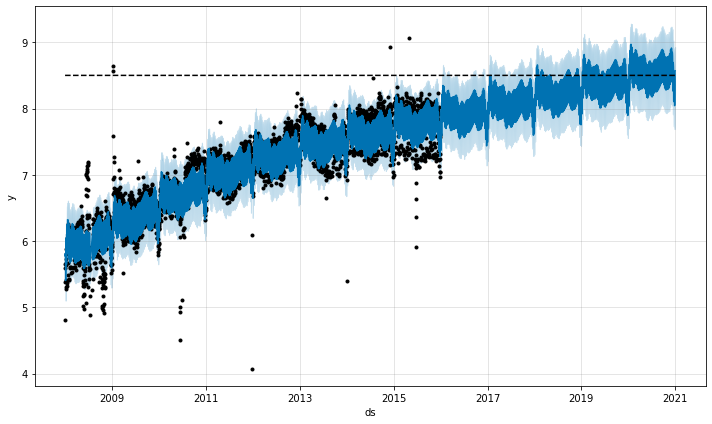

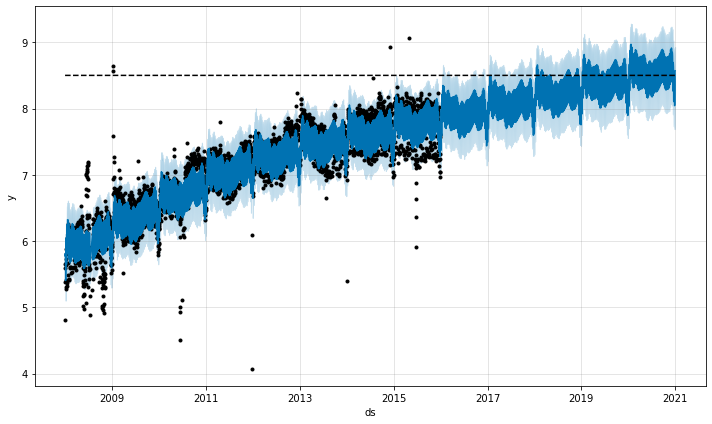

In [47]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.8456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      29       8844.37    2.3067e-05       1.22849           1           1       42   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


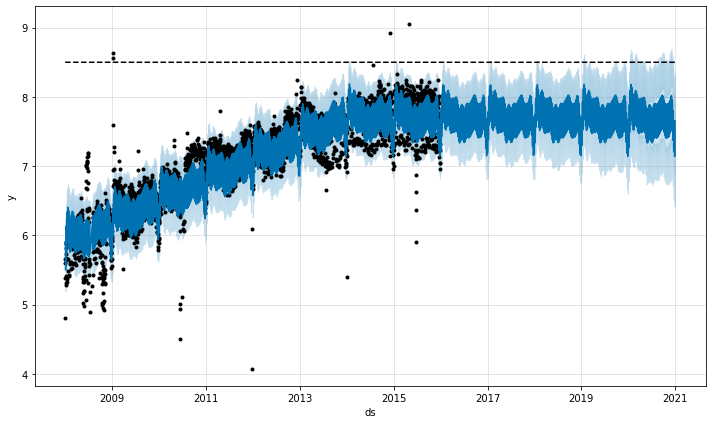

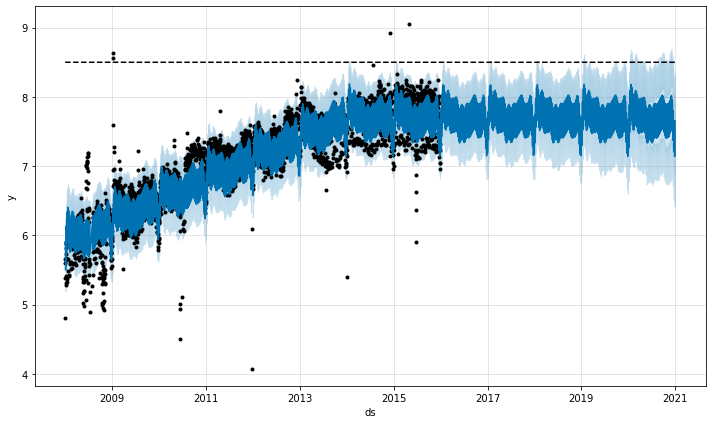

In [48]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.8456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8241.13    0.00843735       294.845           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       8247.52    3.5491e-05       132.675   1.557e-07       0.001      292  LS failed, Hessian reset 
     199       8248.25   0.000578259       176.525           1           1      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8249.75   0.000594985       82.1116       0.483           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       8249.93   3.50766e-05       125.737   1.577e-07       0.001      511  LS failed, Hessian reset 
     364       8250.13   4.92634e-05       155.467   6.528e-07       0.001      598  LS failed, Hessian rese

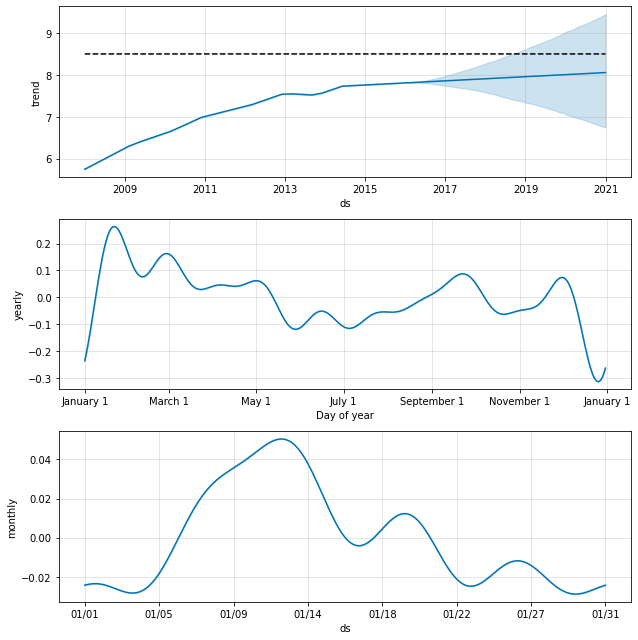

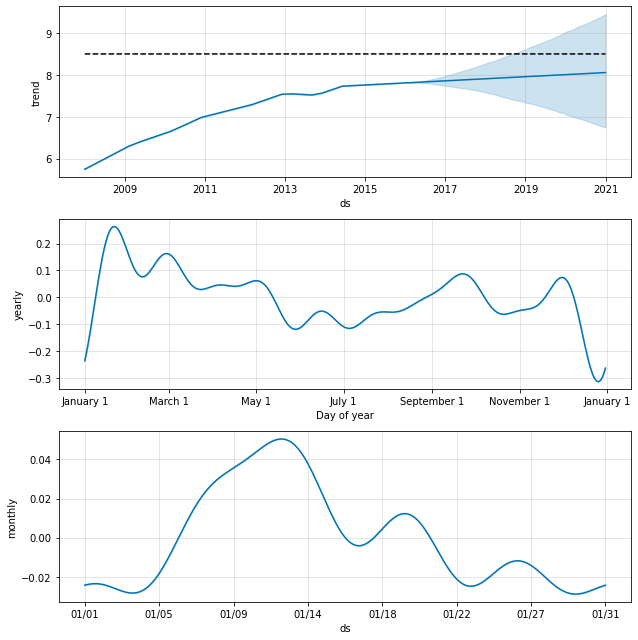

In [49]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
m.plot_components(forecast)

In [50]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [51]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.8456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9063.07    0.00140398       474.498           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        9084.8    0.00239253       508.297           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9092.05   0.000179446       219.648           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9092.71   2.59221e-05        76.405     0.04821           1      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9094.22    0.00126375       205.693      0.5575      0.5575      613   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [52]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2168,2014-02-02,0.041158,0.081725
2169,2014-02-03,0.029762,-0.020885
2510,2015-01-11,0.041158,0.000000
2511,2015-01-12,0.029762,0.000000
2879,2016-01-17,0.041158,0.000000
2880,2016-01-18,0.029762,0.000000
2886,2016-01-24,0.041158,0.000000
2887,2016-01-25,0.029762,0.000000
2900,2016-02-07,0.041158,0.081725
2901,2016-02-08,0.029762,-0.020885


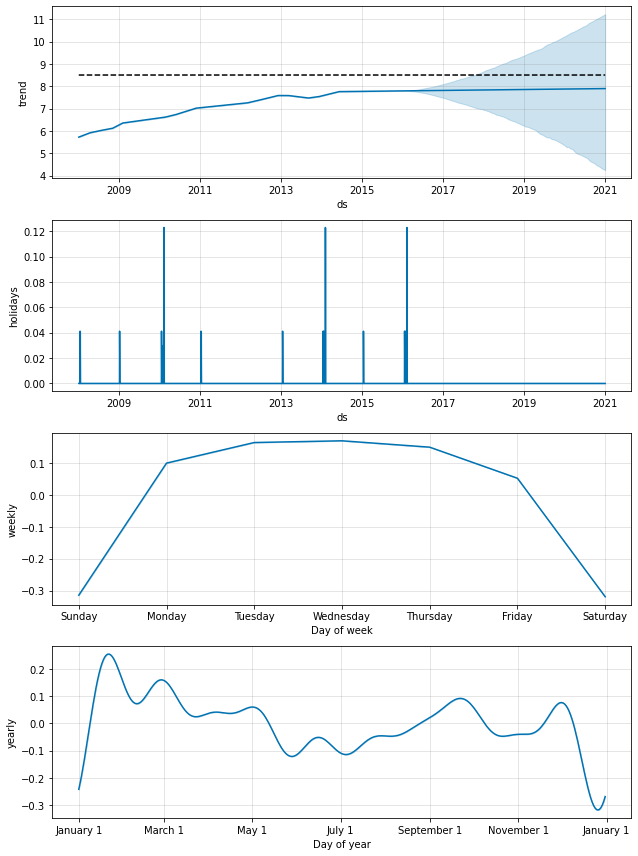

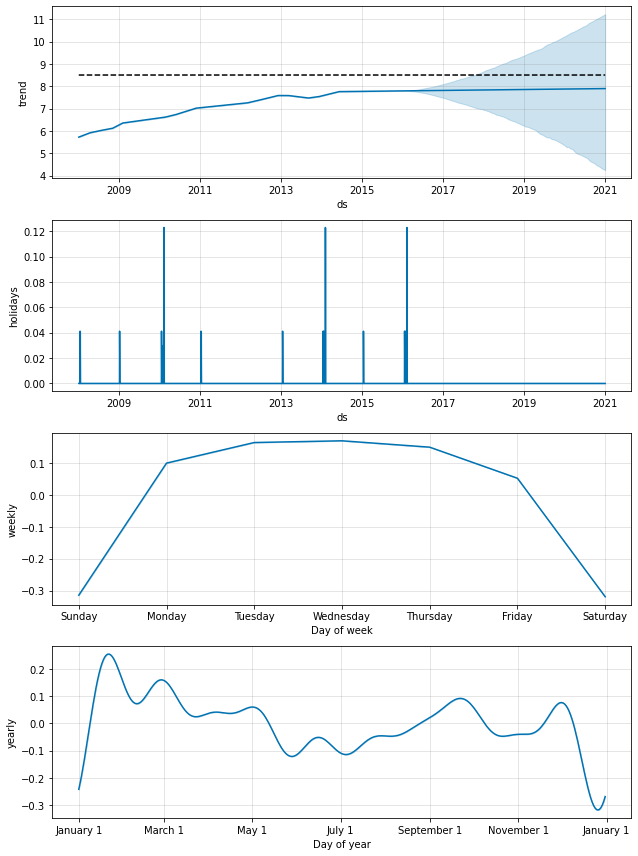

In [53]:
m.plot_components(forecast)